## 机器学习 sklearn1——生成样本数据

#### 1、sklearn自带数据集用于算法练习

load_boston([return_X_y]) 加载波士顿房价数据；用于回归问题

load_iris([return_X_y]) 加载iris 数据集；用于分类问题

load_diabetes([return_X_y]) 加载糖尿病数据集；用于回归问题

load_digits([n_class, return_X_y]) 加载手写字符集；用于分类问题

load_linnerud([return_X_y]) 加载linnerud 数据集；用于多元回归问题

1）、波士顿房价数据，回归使用。样本数据集的特征默认是一个(506, 13)大小的矩阵，样本值是一个包含506个数值的向量。

In [6]:
from sklearn.datasets import load_boston
from sklearn import linear_model
boston = load_boston()
data=boston.data   # 特征矩阵
target = boston.target    # 目标向量
print(type(boston), type(target))
print(data.shape)
print(target.shape)
print('系数矩阵:\n',linear_model.LinearRegression().fit(data,target).coef_)


<class 'sklearn.utils.Bunch'> <class 'numpy.ndarray'>
(506, 13)
(506,)
系数矩阵:
 [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


2）、iris花卉数据，分类使用。样本数据集的特征默认是一个(150, 4)大小的矩阵，样本值是一个包含150个类标号的向量，包含三种分类标号。<br>
IRIS数据集由Fisher在1936年整理，包含4个特征：Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）、Petal.Width（花瓣宽度）），特征值都为正浮点数，单位为厘米。目标值为鸢尾花的3个分类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），Iris Virginica（维吉尼亚鸢尾）。

In [7]:
from sklearn.datasets import load_iris
from sklearn import svm
iris = load_iris()
data=iris.data
target = iris.target
print(data.shape)
print(target.shape)
print('svm模型:\n',svm.SVC().fit(data,target))

(150, 4)
(150,)
svm模型:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


3）、糖尿病数据集，回归使用。样本数据集的特征默认是一个(442, 10)大小的矩阵，样本值是一个包含442个数值的向量

In [8]:
from sklearn.datasets import load_diabetes
from sklearn import linear_model
diabetes = load_diabetes()
data=diabetes.data
target = diabetes.target
print(data.shape)
print(target.shape)
print('系数矩阵:\n',linear_model.LinearRegression().fit(data,target).coef_)

(442, 10)
(442,)
系数矩阵:
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


4）、手写体数据，分类使用。每个手写体数据使用8x8的矩阵存放。样本数据为(1797, 64)大小的数据集

In [9]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt # 画图工具
digits = load_digits()
data=digits.data
print(data.shape)
plt.matshow(digits.images[3])  # 矩阵像素点的样式显示3
# plt.imshow(digits.images[3])  # 图片渐变的样式显示3
# plt.gray()   # 图片显示为灰度模式
plt.show()

(1797, 64)


<Figure size 480x480 with 1 Axes>

5）、linnerud数据集，多元回归使用。样本数据集的特征默认是一个(20, 3)大小的矩阵，样本值也是(20, 3)大小的矩阵。也就是3种特征，有3个输出结果，所以系数矩阵w为(3, 3)。

In [10]:
from sklearn.datasets import load_linnerud
from sklearn import linear_model
linnerud = load_linnerud()
data=linnerud.data
target = linnerud.target
print(data.shape)
print(target.shape)
print('系数矩阵:\n',linear_model.LinearRegression().fit(data,target).coef_)

(20, 3)
(20, 3)
系数矩阵:
 [[-0.47502636 -0.21771647  0.09308837]
 [-0.13687023 -0.04033662  0.0279736 ]
 [ 0.00107079  0.04202941 -0.02946117]]


#### 2、加载样本图案

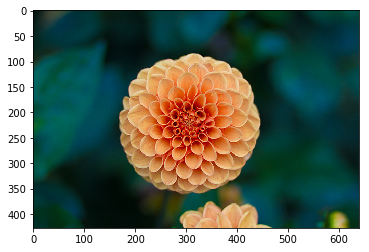

In [45]:
# 图像样本数据集
from imageio import imread
import matplotlib.pyplot as plt # 画图工具
img=imread('D:\Anaconda3\Lib\site-packages\sklearn\datasets\images/flower.jpg')   # 加载sk自带的花朵图案
plt.imshow(img)
plt.show()

#### 3、生成自定义分类数据

sklearn.datasets.make_classification(n_samples=100,n_features=20,n_informative=2,n_redundant=2,n_repeated=0,n_classes=2,n_clusters_per_class=2, weights=None,flip_y=0.01, class_sep=1.0, hypercube=True,shift=0.0, scale=1.0,shuffle=True, random_state=None) 

通常用于分类算法。 
n_features :特征个数= n_informative + n_redundant + n_repeated ；
n_informative：多信息特征的个数 ；
n_redundant：冗余信息，informative特征的随机线性组合 ；
n_repeated ：重复信息，随机提取n_informative和n_redundant 特征 ；
n_classes：分类类别 ；
n_clusters_per_class ：某一个类别是由几个cluster构成的

这里生成的数据集图如下，由于每次生成的数据都不一样，所以读者看到的图片和这里也不一样的 

(100, 2)
(100,)


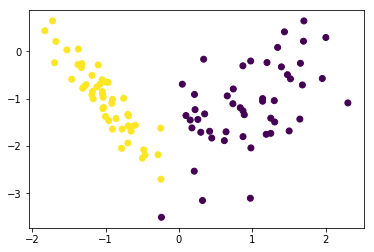

In [13]:
# # ===========生成分类样本数据集===========
from sklearn import datasets
import matplotlib.pyplot as plt # 画图工具
data,target=datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,n_repeated=0, n_classes=2, n_clusters_per_class=1)
print(data.shape)
print(target.shape)
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

#### 4、其他生成分类样本的函数

make_blobs函数会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。

其中： 
n_samples是待生成的样本的总数。 
n_features是每个样本的特征数。 
centers表示类别数。 
cluster_std表示每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。

sklearn.datasets.make_gaussian_quantiles(mean=None, cov=1.0, n_samples=100, n_features=2, n_classes=3, shuffle=True, random_state=None)  

make_gaussian_quantiles函数利用高斯分位点区分不同数据

sklearn.datasets.make_hastie_10_2(n_samples=12000, random_state=None)

make_hastie_10_2函数利用Hastie算法，生成2分类数据

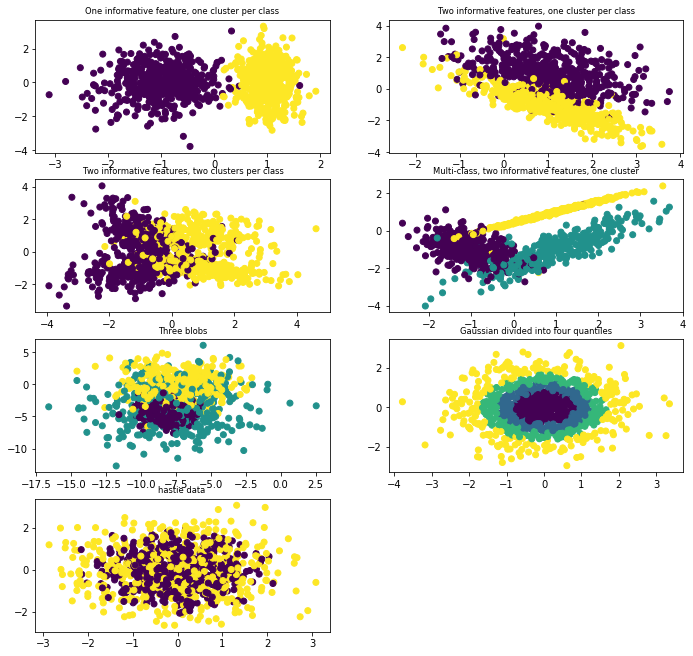

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_hastie_10_2

plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(421)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

plt.subplot(422)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

plt.subplot(423)
plt.title("Two informative features, two clusters per class", fontsize='small')
X2, Y2 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2)

plt.subplot(424)
plt.title("Multi-class, two informative features, one cluster",fontsize='small')
X1, Y1 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

plt.subplot(425)
plt.title("Three blobs", fontsize='small')
# 1000个样本，2个属性，3种类别，方差分别为1.0,3.0,2.0
X1, Y1 = make_blobs(n_samples=1000, n_features=2, centers=3,cluster_std=[1.0,3.0,2.0])
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

plt.subplot(426)
plt.title("Gaussian divided into four quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=4)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

plt.subplot(427)
plt.title("hastie data ", fontsize='small')
X1, Y1 = make_hastie_10_2(n_samples=1000)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

#### 5、自定义生成圆形和月牙形分类数据

生成环形数据：

sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)  

factor ：外圈与内圈的尺度因子<1

生成半环形图：

sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)  

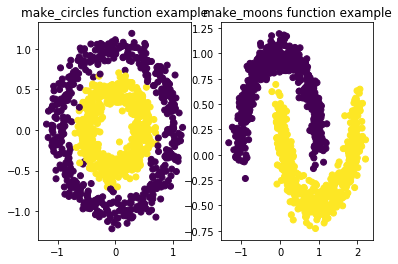

In [30]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

fig = plt.figure(1)
x1, y1 = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.subplot(121)
plt.title('make_circles function example')
plt.scatter(x1[:, 0], x1[:, 1], marker='o', c=y1)

plt.subplot(122)
x1, y1 = make_moons(n_samples=1000, noise=0.1)
plt.title('make_moons function example')
plt.scatter(x1[:, 0], x1[:, 1], marker='o', c=y1)
plt.show()

#### 6、自定义生成回归样本

from sklearn.datasets import make_regression

示列参数的意思：100个例子，1种特征，1种输出，噪声的大小为2（数据的离散程度）

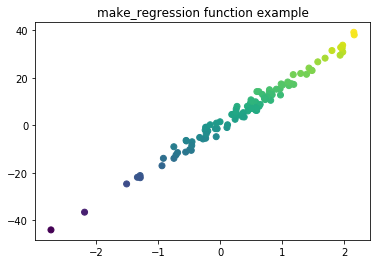

In [26]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

fig = plt.figure(1)
x1, y1 = make_regression(n_samples=100,n_features=1,n_targets=1,noise=2)
plt.title('make_regression function example')
plt.scatter(x1, y1, marker='o', c=y1)
plt.show()